# Практическая работа №3: Кластерный анализ

Выполнила студентка гр. 0373 Серебрякова Софья. Вариант 19

## Цель работы

Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения
__Кластерный анализ__ - задача разбиения выборки объектов на подмножества, называемые кластерами, таким образом, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались. <br>
__Метрика__ - функция на парах элементов множества, вводящая на нём расстояние. <br>
__Нормирование по методу минимакс:__ <br>
$X_{норм} = \frac{X - X_{min}}{X_{max} - X_{min}}$ <br>
__Грубая верхняя оценка количества кластеров:__ <br>
$\lfloor \sqrt{\frac{n}{2}} \rfloor $<br>
__Алгоритм метода k-means:__ <br>
1. Случайно выбирается k точек - центроидов<br>
2. Каждый объект относится к кластеру с ближайшим центром<br>
3. Проводится пересчет центров как центров масс каждого кластера согласно текущему членству<br>
4. Проводится проверка на стабилизацию, то есть проверяется, совпадают ли новые центры с предыдущими, если да, то алгоритм останавливает свое действие, если нет, то переход на пункт 2<br>

__Метод k-medians__ схож с методом k-means, за тем отличием, что при определении центроида берутся не средние значения, а медианы, а в качестве метрики не Евклидово расстояние, а Манхеттенское. <br>
__Евклидово расстояние:__ <br>
$d(x, y) = \sqrt{\Sigma (x_{i} - y_{i})^{2}}$<br>
__Манхенттенское расстояние:__ <br>
$d(x, y) = \Sigma |x_{i} - y_{i}|$<br>
__Алгоритм метода силуэтов:__ <br>
По каждому разбиению на кластеры высчитывается внутрикластерное и межкластерное расстояния, после чего находится коэффициент $s_{i}$:<br>
$s_{i} = \frac{b_{i} - a_{i}}{max(b_{i}, a_{i})}$<br>
$a_{i} = \frac{1}{\# C_{j} - 1} \Sigma d(x_{j}, x_{C_{i}}) $<br>
$b_{i} = min \frac{1}{\# C_{j}} \Sigma d(x_{j}, x_{C_{i}}) $ <br>
После чего строится график полученных коэффициентов, по перегибу которого определяется оптимальное количество кластеров.<br>
__Алгоритм FOREL:__ <br>
1. Обозначается множество всех точек
2. Выбирается случайная точка, обозначаемая центроидом
3. Создается кластер из точек, находящихся в окружности радуса R от центроида
4. Центроид перемещается в центр масс нового кластера
5. Проводится проверка на стабилизацию, то есть проверяется, совпадает ли новый центр с предыдущим
6. Получившийся кластер исключается из множества точек
Алгоритм повторяется до тех пор, пока изначальное множество точек не станет пустым. <br>

## Постановка задачи

Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно  проинтерпретировать.

## Выполнение работы

Каждый пункт выполняется с помощью кода на языке Python.

In [276]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from collections import Counter
from prettytable import PrettyTable
import random

### Задание 1
Нормализовать множество точек из предыдущей работы, отобразить полученное множество.

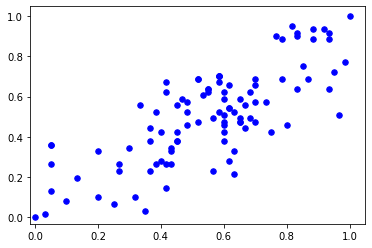

In [405]:
math = [44, 78, 52, 44, 35, 56, 67, 54, 60, 73, 71, 61, 74, 79, 84, 58, 67, 85, 68, 65, 68, 59, 90, 82, 59, 85, 66, 48, 70, 35, 54, 71, 77, 63, 58, 82, 92, 55, 70, 69, 57, 67, 89, 81, 57, 56, 71, 68, 61, 88, 65, 38, 67, 71, 72, 74, 68, 57, 48, 35, 65, 69, 63, 67, 66, 74, 64, 40, 53, 57, 82, 88, 59, 76, 80, 68, 61, 47, 32, 87, 69, 72, 35, 68, 55, 88, 91, 73, 70, 51, 68, 69, 74, 58, 83, 54, 50, 63, 59, 79, 34]
write = [44, 93, 72, 58, 60, 64, 81, 61, 74, 76, 67, 70, 80, 92, 80, 54, 79, 95, 66, 77, 74, 61, 69, 93, 64, 92, 52, 52, 51, 46, 65, 74, 64, 80, 59, 77, 99, 54, 70, 78, 47, 81, 82, 96, 79, 55, 67, 76, 73, 92, 77, 43, 70, 68, 65, 67, 69, 54, 54, 54, 76, 71, 80, 81, 68, 78, 75, 50, 40, 76, 94, 77, 72, 73, 66, 67, 66, 42, 38, 95, 55, 72, 60, 61, 70, 94, 85, 68, 58, 44, 64, 71, 73, 58, 84, 52, 59, 67, 61, 80, 39]
n = len(math)
x_min = min(math)
y_min = min(write)
x_max = max(math)
y_max = max(write)

for i in range(n):
    math[i] = (math[i] - x_min)/(x_max - x_min)
    write[i] = (write[i] - y_min)/(y_max - y_min)

for i in range(len(math)):
    plt.scatter(math[i], write[i], color = "blue", s=30)

### Задание 2
Определить «грубую» верхнюю оценку количества кластеров k.

In [406]:
rude_clusters = mth.floor((n/2)**0.5)
print("Грубая верхняя оценка количества кластеров:", rude_clusters)

Грубая верхняя оценка количества кластеров: 7


### Задание 3
Реализовать алгоритм k-means. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

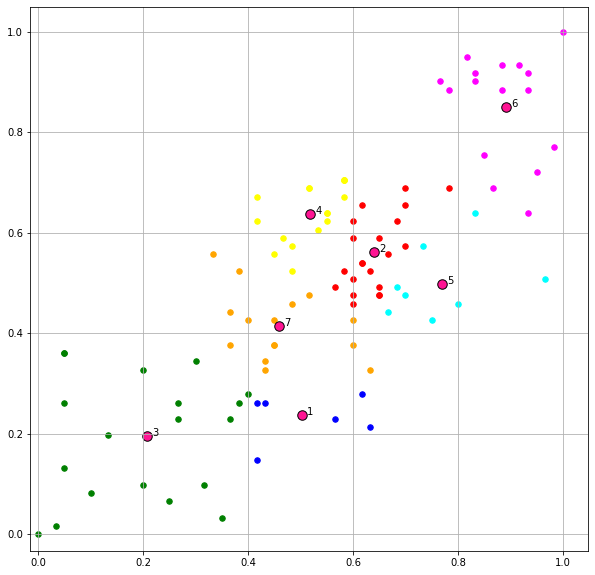

In [407]:
def k_means(rude_clusters, center, prev_center):
    klast_nums = np.zeros(rude_clusters)
    clusters = np.zeros(n)
    #идем по всем точкам
    for j in range(n):
        distance = np.zeros(rude_clusters)
        for i in range(rude_clusters):
            #считаем все расстояния от точки до центров
            distance[i] = np.sqrt((math[j] - center[i][0]) ** 2 + (write[j] - center[i][1]) ** 2)
        #находим наименьшее расстояние
        mindistance = np.min(distance)
        clusters[j] += np.where(distance == mindistance)      
    #копируем центр
    for i in range(len(center)):
        prev_center[i] = center[i]
    
    return clusters, prev_center

def change_center(center, clusters, rude_clusters):
    clust_nums = np.ones(rude_clusters)
    for i in range(n):
        clust_nums[int(clusters[i])] += 1
    for i in range(n):
        center[int(clusters[i])][0] += math[i]
        center[int(clusters[i])][1] += write[i]
    for i in range(rude_clusters):
        center[i][0] /= clust_nums[i]
        center[i][1] /= clust_nums[i]
    return center, clust_nums

def cluster_color(clusters):
    if clusters[i] == 0: 
         return plt.scatter(math[i], write[i], color = "blue", s=30)
    if clusters[i] == 1: 
         return plt.scatter(math[i], write[i], color = "red", s=30)
    if clusters[i] == 2: 
         return plt.scatter(math[i], write[i], color = "green", s=30)
    if clusters[i] == 3: 
         return plt.scatter(math[i], write[i], color = "yellow", s=30)
    if clusters[i] == 4: 
         return plt.scatter(math[i], write[i], color = "cyan", s=30)
    if clusters[i] == 5: 
         return plt.scatter(math[i], write[i], color = "magenta", s=30)
    if clusters[i] == 6: 
         return plt.scatter(math[i], write[i], color = "orange", s=30)

center = [[math[15], write[15]], [math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
prev_center = [[math[12], write[12]], [math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
while(True):
    clusters, prev_center = k_means(rude_clusters, center, prev_center)
    center, clust_nums = change_center(center, clusters, rude_clusters)
    if (center == prev_center): break
        
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(n):
        cluster_color(clusters)
for i in range(len(center)):
    plt.scatter(center[i][0], center[i][1], color = "deeppink", s=90, edgecolors='black')
    plt.annotate(i+1, (center[i][0]+0.01, center[i][1]))
plt.grid(True)

### Задание 4
Реализовать алгоритмы k-medians. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

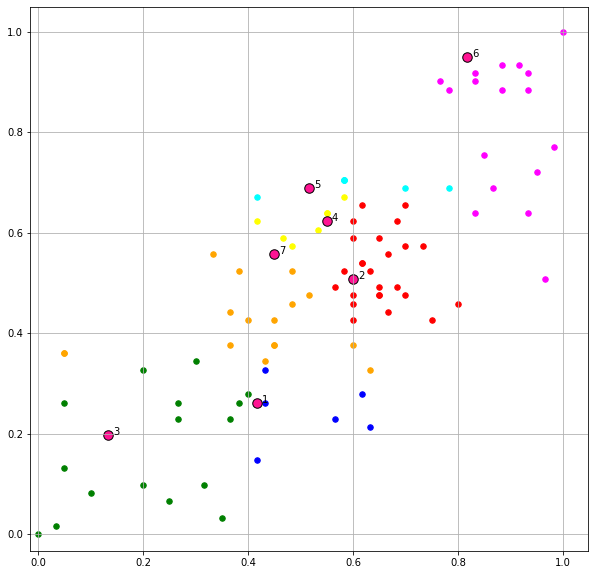

In [408]:
def k_medians(rude_clusters, center, prev_center):
    klast_nums = np.zeros(rude_clusters)
    clusters = np.zeros(n)
    #идем по всем точкам
    for j in range(n):
        distance = np.zeros(rude_clusters)
        for i in range(rude_clusters):
            #считаем все расстояния от точки до центров
            distance[i] = abs(math[j] - center[i][0]) + abs(write[j] - center[i][1])
        #находим наименьшее расстояние
        mindistance = np.min(distance)
        clusters[j] += np.where(distance == mindistance)
    #копируем центр
    for i in range(len(center)):
        prev_center[i] = center[i]
    
    return clusters, prev_center

def change_center_medians(center, clusters, rude_clusters):
    clust_nums = np.ones(rude_clusters)
    clust_medians = np.ones(rude_clusters)
    tmp = 0
    for i in range(n):
        clust_nums[int(clusters[i])] += 1
    for i in range(rude_clusters):
        clust_medians[i] = mth.trunc((clust_nums[i]+1)/2)
    for i in range(rude_clusters):
        for j in range(n):
            if (clusters[j] == i):
                if (tmp == clust_medians[i]):
                    center[i][0] = math[j]
                    center[i][1] = write[j]
                    tmp = 0
                    break
                tmp += 1
    return center, clust_nums

center = [[math[15], write[15]], [math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[86], write[86]], [math[98], write[98]]]
prev_center = [[math[12], write[12]], [math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[86], write[86]], [math[98], write[98]]]
while(True):
    clusters, prev_center = k_medians(rude_clusters, center, prev_center)
    center, clust_nums = change_center_medians(center, clusters, rude_clusters)
    if (center == prev_center): break
        
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(n):
        cluster_color(clusters)
for i in range(len(center)):
    plt.scatter(center[i][0], center[i][1], color = "deeppink", s=90, edgecolors='black')
    plt.annotate(i+1, (center[i][0]+0.01, center[i][1]))
plt.grid(True)

### Задание 5
Для каждого метода заполнить следующую таблицу, где значения 𝑘 изменяются от 1 до ˜𝑘:

In [409]:
def clust_table_means(k, center, prev_center):
    while(True):
        clusters, prev_center = k_means(k, center, prev_center)
        center, clust_nums = change_center(center, clusters, k)
        if (center == prev_center): break
    for i in range(k):
        center[i][0] = round(center[i][0], 3)
        center[i][1] = round(center[i][1], 3)
        clust_nums[i] -= 1
        clust_nums[i]
    return center, clust_nums

center1 = [[math[50], write[50]]]
prev_center1 = [[math[60], write[60]]]
center1, clust_nums1 = clust_table_means(1, center1, prev_center1)
center2 = [[math[20], write[20]], [math[50], write[50]]]
prev_center2 = [[math[25], write[25]], [math[50], write[50]]]
center2, clust_nums2 = clust_table_means(2, center2, prev_center2)
center3 = [[math[20], write[20]], [math[50], write[50]], [math[98], write[98]]]
prev_center3 = [[math[25], write[25]], [math[50], write[50]], [math[98], write[98]]]
center3, clust_nums3 = clust_table_means(3, center3, prev_center3)
center4 = [[math[20], write[20]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
prev_center4 = [[math[25], write[25]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
center4, clust_nums4 = clust_table_means(4, center4, prev_center4)
center5 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
prev_center5 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
center5, clust_nums5 = clust_table_means(5, center5, prev_center5)
center6 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
prev_center6 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
center6, clust_nums6 = clust_table_means(6, center6, prev_center6)
center7 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
prev_center7 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
center7, clust_nums7 = clust_table_means(7, center7, prev_center7)

table_mean = PrettyTable(["Значение k", "Центроиды кластера", "Объем кластера"])
table_mean.add_row(["1", center1, clust_nums1])
table_mean.add_row(["2", center2, clust_nums2])
table_mean.add_row(["3", center3, clust_nums3])
table_mean.add_row(["4", center4, clust_nums4])
table_mean.add_row(["5", center5, clust_nums5])
table_mean.add_row(["6", center6, clust_nums6])
table_mean.add_row(["7", center7, clust_nums7])

print(table_mean)

+------------+--------------------------------------------------------------------------------------------------------------+-------------------------------+
| Значение k |                                              Центроиды кластера                                              |         Объем кластера        |
+------------+--------------------------------------------------------------------------------------------------------------+-------------------------------+
|     1      |                                               [[0.552, 0.506]]                                               |             [101.]            |
|     2      |                                       [[0.59, 0.462], [0.474, 0.602]]                                        |           [69. 32.]           |
|     3      |                               [[0.736, 0.614], [0.597, 0.711], [0.346, 0.284]]                               |         [39. 22. 40.]         |
|     4      |                       [[0.699, 0.633]

In [11]:
def clust_table_meds(k, center, prev_center):
    while(True):
        clusters, prev_center = k_medians(k, center, prev_center)
        center, clust_nums = change_center_medians(center, clusters, k)
        if (center == prev_center): break
    for i in range(k):
        center[i][0] = round(center[i][0], 3)
        center[i][1] = round(center[i][1], 3)
        clust_nums[i] -= 1
        clust_nums[i]
    return center, clust_nums

center1 = [[math[50], write[50]]]
prev_center1 = [[math[60], write[60]]]
center1, clust_nums1 = clust_table_meds(1, center1, prev_center1)
center2 = [[math[20], write[20]], [math[50], write[50]]]
prev_center2 = [[math[25], write[25]], [math[50], write[50]]]
center2, clust_nums2 = clust_table_meds(2, center2, prev_center2)
center3 = [[math[20], write[20]], [math[50], write[50]], [math[98], write[98]]]
prev_center3 = [[math[25], write[25]], [math[50], write[50]], [math[98], write[98]]]
center3, clust_nums3 = clust_table_meds(3, center3, prev_center3)
center4 = [[math[20], write[20]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
prev_center4 = [[math[25], write[25]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
center4, clust_nums4 = clust_table_meds(4, center4, prev_center4)
center5 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
prev_center5 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
center5, clust_nums5 = clust_table_meds(5, center5, prev_center5)
center6 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
prev_center6 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
center6, clust_nums6 = clust_table_meds(6, center6, prev_center6)
center7 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
prev_center7 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
center7, clust_nums7 = clust_table_meds(7, center7, prev_center7)

table_medians = PrettyTable(["Значение k", "Центроиды кластера", "Объем кластера"])
table_medians.add_row(["1", center1, clust_nums1])
table_medians.add_row(["2", center2, clust_nums2])
table_medians.add_row(["3", center3, clust_nums3])
table_medians.add_row(["4", center4, clust_nums4])
table_medians.add_row(["5", center5, clust_nums5])
table_medians.add_row(["6", center6, clust_nums6])
table_medians.add_row(["7", center7, clust_nums7])

print(table_medians)

+------------+-------------------------------------------------------------------------------------------------------------+-------------------------------+
| Значение k |                                              Центроиды кластера                                             |         Объем кластера        |
+------------+-------------------------------------------------------------------------------------------------------------+-------------------------------+
|     1      |                                                [[0.1, 0.082]]                                               |             [101.]            |
|     2      |                                        [[0.65, 0.492], [0.1, 0.082]]                                        |           [51. 50.]           |
|     3      |                                [[0.65, 0.492], [0.55, 0.639], [0.267, 0.262]]                               |         [46. 14. 41.]         |
|     4      |                        [[0.6, 0.508], [0.55

### Задание 6
С помощью метода силуэтов (для нечётных вариантов) выявить для каждого метода оптимальное количество кластеров.

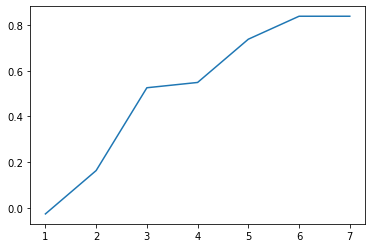

In [410]:
def distance_in_cluster(k, center, prev_center):
    #разбиваем на кластеры
    while(True):
        clusters, prev_center = k_means(k, center, prev_center)
        center, clust_nums = change_center(center, clusters, k)
        if (center == prev_center): break
    distance = np.zeros(int(clust_nums[0])-1)
    #получаем опорную точку
    for i in range(n):
            if (clusters[i] == 0): 
                check_dot = [math[i], write[i]]
                break
    j = 0
    while(j != int(clust_nums[0])-1):
        for i in range(n):
            if (clusters[i] == 0): 
                distance[j] = np.sqrt((math[i] - check_dot[0]) ** 2 + (write[i] - check_dot[1]) ** 2)
                j += 1
    distance = np.mean(distance)
    return distance

def distance_out_cluster(k, center, prev_center):
    while(True):
        clusters, prev_center = k_means(k, center, prev_center)
        center, clust_nums = change_center(center, clusters, k)
        if (center == prev_center): break
    #получаем опорную точку
    for i in range(n):
            if (clusters[i] == 0): 
                check_dot = [math[i], write[i]]
                break
    #находим ближайший кластер
    distance_neib = np.zeros(k)
    for j in range(k):
        for i in range(n):
            if (clusters[i] != 0 and clusters[i] == j):
                distance_neib[j] = np.sqrt((math[i] - check_dot[0]) ** 2 + (write[i] - check_dot[1]) ** 2)
    for i in range(k):
        if (max(distance_neib) == distance_neib[i]): neib = i
    j = 0
    distance = np.zeros(int(clust_nums[neib]))-1
    while(j != int(clust_nums[neib])-1):
        for i in range(n):
            if (clusters[i] == neib): 
                distance[j] = np.sqrt((math[i] - check_dot[0]) ** 2 + (write[i] - check_dot[1]) ** 2)
                j += 1
    distance = np.mean(distance)
    return distance


center1 = [[math[50], write[50]]]
prev_center1 = [[math[60], write[60]]]
distance_a1 = distance_in_cluster(1, center1, prev_center1)
distance_b1 = distance_out_cluster(1, center1, prev_center1)
sil1 = (distance_b1 - distance_a1)/max(distance_a1, distance_b1)

center2 = [[math[20], write[20]], [math[50], write[50]]]
prev_center2 = [[math[25], write[25]], [math[50], write[50]]]
distance_a2 = distance_in_cluster(2, center2, prev_center2)
distance_b2 = distance_out_cluster(2, center2, prev_center2)
sil2 = (distance_b2 - distance_a2)/max(distance_a1, distance_b1)

center3 = [[math[20], write[20]], [math[50], write[50]], [math[98], write[98]]]
prev_center3 = [[math[25], write[25]], [math[50], write[50]], [math[98], write[98]]]
distance_a3 = distance_in_cluster(3, center3, prev_center3)
distance_b3 = distance_out_cluster(3, center3, prev_center3)
sil3 = (distance_b3 - distance_a3)/max(distance_a1, distance_b1)

center4 = [[math[20], write[20]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
prev_center4 = [[math[25], write[25]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
distance_a4 = distance_in_cluster(4, center4, prev_center4)
distance_b4 = distance_out_cluster(4, center4, prev_center4)
sil4 = (distance_b4 - distance_a4)/max(distance_a1, distance_b1)

center5 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
prev_center5 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
distance_a5 = distance_in_cluster(5, center5, prev_center5)
distance_b5 = distance_out_cluster(5, center5, prev_center5)
sil5 = (distance_b5 - distance_a5)/max(distance_a1, distance_b1)

center6 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
prev_center6 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
distance_a6 = distance_in_cluster(6, center6, prev_center6)
distance_b6 = distance_out_cluster(6, center6, prev_center6)
sil6 = (distance_b6 - distance_a6)/max(distance_a1, distance_b1)

center7 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
prev_center7 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
distance_a7 = distance_in_cluster(7, center7, prev_center7)
distance_b7 = distance_out_cluster(7, center7, prev_center7)
sil7 = (distance_b7 - distance_a7)/max(distance_a1, distance_b1)

i = [1, 2, 3, 4, 5, 6, 7]
sil = [sil1 ,sil2 ,sil3 ,sil4 ,sil5 ,sil6 ,sil7]
plt.plot(i, sil)

#### Вывод:
Для метода k-means, исходя из перелома на графике, наиболее подходит 3 кластера

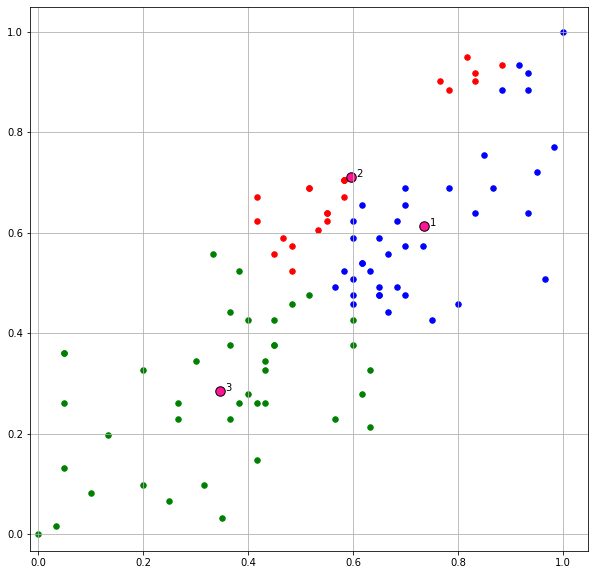

In [411]:
center3 = [[math[20], write[20]], [math[50], write[50]], [math[98], write[98]]]
prev_center3 = [[math[25], write[25]], [math[50], write[50]], [math[98], write[98]]]
while(True):
    clusters3, prev_center3 = k_means(3, center3, prev_center3)
    center3, clust_nums3 = change_center(center3, clusters3, 3)
    if (center3 == prev_center3): break
        
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(n):
        cluster_color(clusters3)
for i in range(len(center3)):
    plt.scatter(center3[i][0], center3[i][1], color = "deeppink", s=90, edgecolors='black')
    plt.annotate(i+1, (center3[i][0]+0.01, center3[i][1]))
plt.grid(True)


[-0.02707282315909041, 0.8658507165548734, 0.17412156868556306, 0.21598714113738138, 0.5228509698076957, 0.6052889472767881, 0.601919754772786]


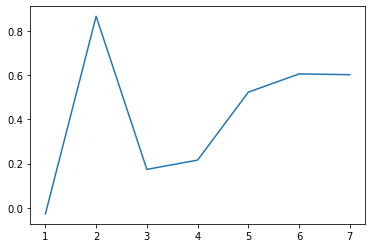

In [412]:
def distance_in_cluster(k, center, prev_center):
    #разбиваем на кластеры
    while(True):
        clusters, prev_center = k_medians(k, center, prev_center)
        center, clust_nums = change_center_medians(center, clusters, k)
        if (center == prev_center): break
    distance = np.zeros(int(clust_nums[0])-1)
    #получаем опорную точку
    for i in range(n):
            if (clusters[i] == 0): 
                check_dot = [math[i], write[i]]
                break
    j = 0
    while(j != int(clust_nums[0])-1):
        for i in range(n):
            if (clusters[i] == 0): 
                distance[j] = np.sqrt((math[i] - check_dot[0]) ** 2 + (write[i] - check_dot[1]) ** 2)
                j += 1
    distance = np.mean(distance)
    return distance

def distance_out_cluster(k, center, prev_center):
    while(True):
        clusters, prev_center = k_medians(k, center, prev_center)
        center, clust_nums = change_center_medians(center, clusters, k)
        if (center == prev_center): break
    #получаем опорную точку
    for i in range(n):
            if (clusters[i] == 0): 
                check_dot = [math[i], write[i]]
                break
    #находим ближайший кластер
    distance_neib = np.zeros(k)
    for j in range(k):
        for i in range(n):
            if (clusters[i] != 0 and clusters[i] == j):
                distance_neib[j] = np.sqrt((math[i] - check_dot[0]) ** 2 + (write[i] - check_dot[1]) ** 2)
    for i in range(k):
        if (max(distance_neib) == distance_neib[i]): neib = i
    j = 0
    distance = np.zeros(int(clust_nums[neib]))-1
    while(j != int(clust_nums[neib])-1):
        for i in range(n):
            if (clusters[i] == neib): 
                distance[j] = np.sqrt((math[i] - check_dot[0]) ** 2 + (write[i] - check_dot[1]) ** 2)
                j += 1
    distance = np.mean(distance)
    return distance


center1 = [[math[50], write[50]]]
prev_center1 = [[math[60], write[60]]]
distance_a1 = distance_in_cluster(1, center1, prev_center1)
distance_b1 = distance_out_cluster(1, center1, prev_center1)
sil1 = (distance_b1 - distance_a1)/max(distance_a1, distance_b1)

center2 = [[math[20], write[20]], [math[50], write[50]]]
prev_center2 = [[math[25], write[25]], [math[50], write[50]]]
distance_a2 = distance_in_cluster(2, center2, prev_center2)
distance_b2 = distance_out_cluster(2, center2, prev_center2)
sil2 = (distance_b2 - distance_a2)/max(distance_a1, distance_b1)

center3 = [[math[20], write[20]], [math[50], write[50]], [math[98], write[98]]]
prev_center3 = [[math[25], write[25]], [math[50], write[50]], [math[98], write[98]]]
distance_a3 = distance_in_cluster(3, center3, prev_center3)
distance_b3 = distance_out_cluster(3, center3, prev_center3)
sil3 = (distance_b3 - distance_a3)/max(distance_a1, distance_b1)

center4 = [[math[20], write[20]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
prev_center4 = [[math[25], write[25]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
distance_a4 = distance_in_cluster(4, center4, prev_center4)
distance_b4 = distance_out_cluster(4, center4, prev_center4)
sil4 = (distance_b4 - distance_a4)/max(distance_a1, distance_b1)

center5 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
prev_center5 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[98], write[98]]]
distance_a5 = distance_in_cluster(5, center5, prev_center5)
distance_b5 = distance_out_cluster(5, center5, prev_center5)
sil5 = (distance_b5 - distance_a5)/max(distance_a1, distance_b1)

center6 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
prev_center6 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
distance_a6 = distance_in_cluster(6, center6, prev_center6)
distance_b6 = distance_out_cluster(6, center6, prev_center6)
sil6 = (distance_b6 - distance_a6)/max(distance_a1, distance_b1)

center7 = [[math[20], write[20]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
prev_center7 = [[math[25], write[25]], [math[37], write[37]], [math[50], write[50]], [math[62], write[62]], [math[74], write[74]], [math[86], write[86]], [math[98], write[98]]]
distance_a7 = distance_in_cluster(7, center7, prev_center7)
distance_b7 = distance_out_cluster(7, center7, prev_center7)
sil7 = (distance_b7 - distance_a7)/max(distance_a1, distance_b1)

i = [1, 2, 3, 4, 5, 6, 7]
sil = [sil1 ,sil2 ,sil3 ,sil4 ,sil5 ,sil6 ,sil7]
print(sil)
plt.plot(i, sil)

#### Вывод:
Для метода k-medians, исходя из перелома на графике, наиболее подходит 2 кластера

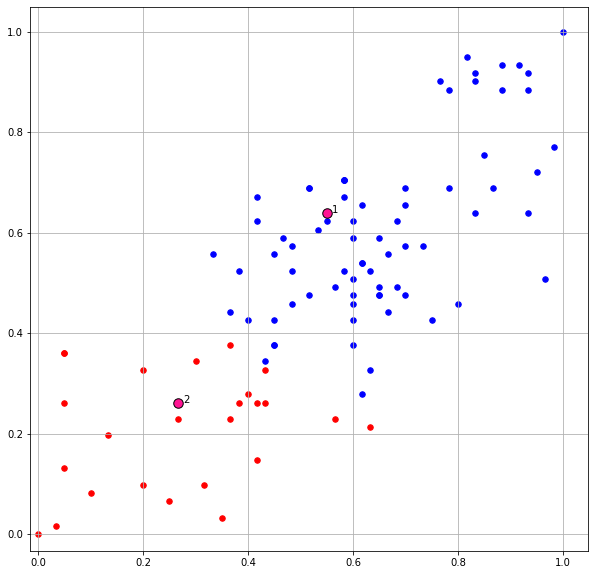

In [413]:
center2 = [[math[33], write[33]], [math[67], write[67]]]
prev_center2 = [[math[25], write[25]], [math[80], write[80]]]
while(True):
    clusters2, prev_center2 = k_medians(2, center2, prev_center2)
    center2, clust_nums2 = change_center_medians(center2, clusters2, 2)
    if (center2 == prev_center2): break
        
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(n):
        cluster_color(clusters2)
for i in range(len(center2)):
    plt.scatter(center2[i][0], center2[i][1], color = "deeppink", s=90, edgecolors='black')
    plt.annotate(i+1, (center2[i][0]+0.01, center2[i][1]))
plt.grid(True)

### Задание 7
Реализовать алгоритм поиска сгущений при различных радиусах 𝑅, отобразить полученные кластеры, выделить каждый кластер разным цветом или маркером, отметить центроиды. Результаты представить в виде таблицы:

In [414]:
def clusters_R(r):
    clusters = {}
    centers = {}
    dots = []
    len_c = []
    k = 0
    for i in range(n):
            dots.append([math[i], write[i]])
    while(len(dots) > 0):  
        center = [dots[0][0], dots[0][1]]
        while(True):
            sum_clust0 = 0
            sum_clust1 = 0
            clusters[k] = []
            new_center = center          
            for i in range(len(dots)):
                if (np.sqrt((dots[i][0] - center[0])**2 + (dots[i][1] - center[1])**2) <= r):
                    clusters[k].append([dots[i][0], dots[i][1]])
                    sum_clust0 += dots[i][0]
                    sum_clust1 += dots[i][1]
            sum_clust0 /= len(clusters[k])
            sum_clust1 /= len(clusters[k])
            center = [sum_clust0, sum_clust1]
            if (new_center == center):
                centers[k] = center
                k += 1
                break
        for i in clusters[k-1]:
            if i in dots:
                dots.remove(i)
    for i in range(len(clusters)):
        centers[i][0] = round(centers[i][0], 3)
        centers[i][1] = round(centers[i][1], 3)
        len_c.append(len(clusters[i]))
    return clusters, centers, k, len_c

In [415]:
D = np.zeros(n)
for i in range(n):
    for j in range(n-1):
        if (i > j):
            D[i] = np.sqrt((math[i] - math[j])**2 + (write[i] - write[j])**2)
Rmin = min(D)
Rmax = max(D)
print(Rmin, " < R < ", Rmax)

0.0  < R <  1.3089805789891165


+---------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------+
|        Радиус       |                                                                                                                  Центроиды кластера                                                                                                                  |               Объем кластера               |
+---------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------+
| 0.16362257237363956 | {0: [0.198, 0.145], 1: [0.85

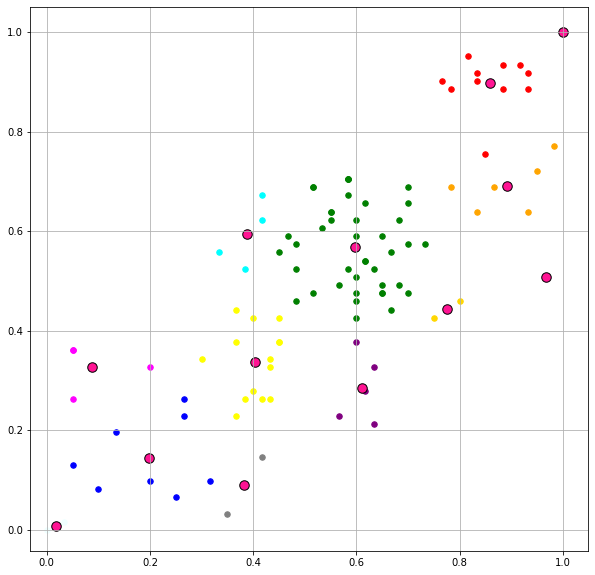

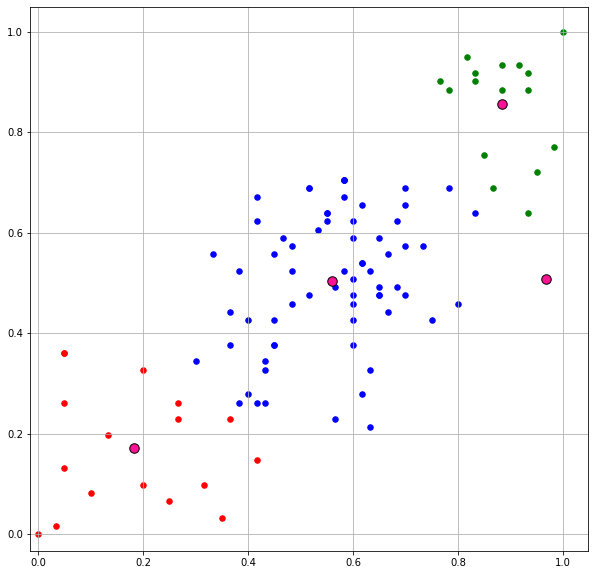

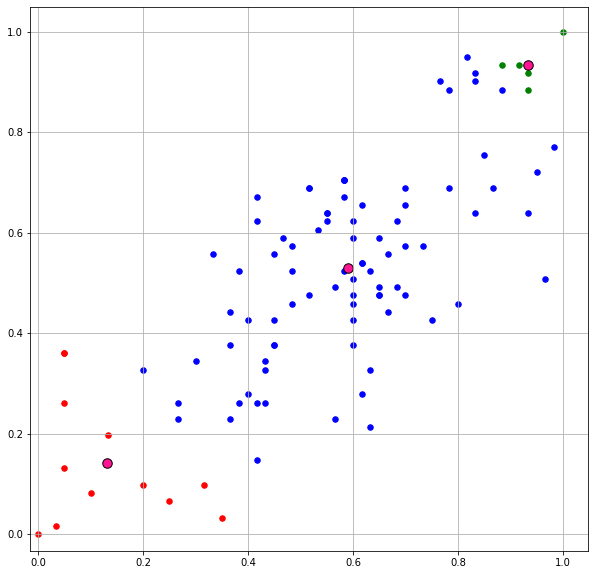

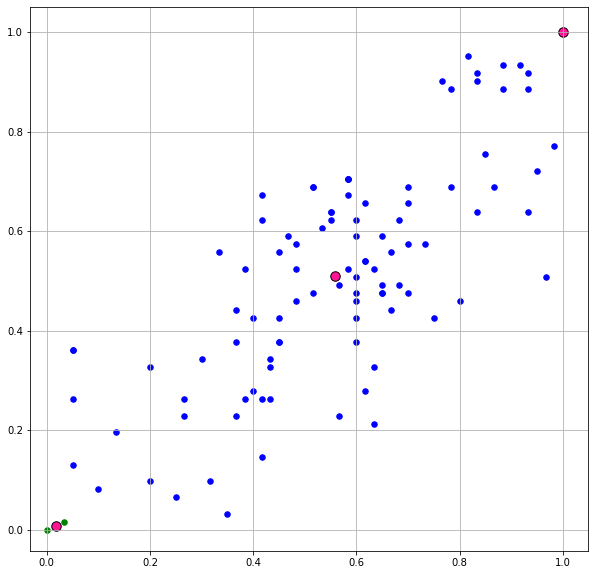

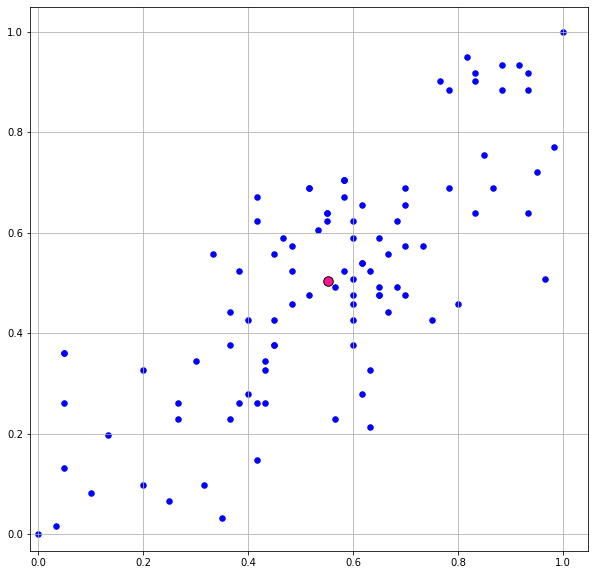

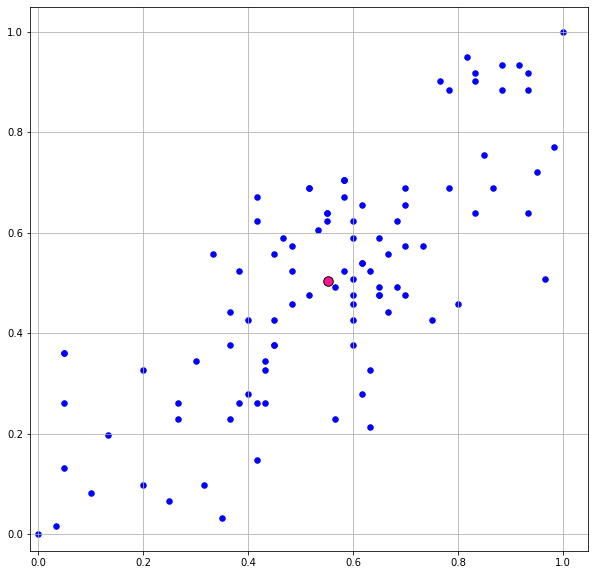

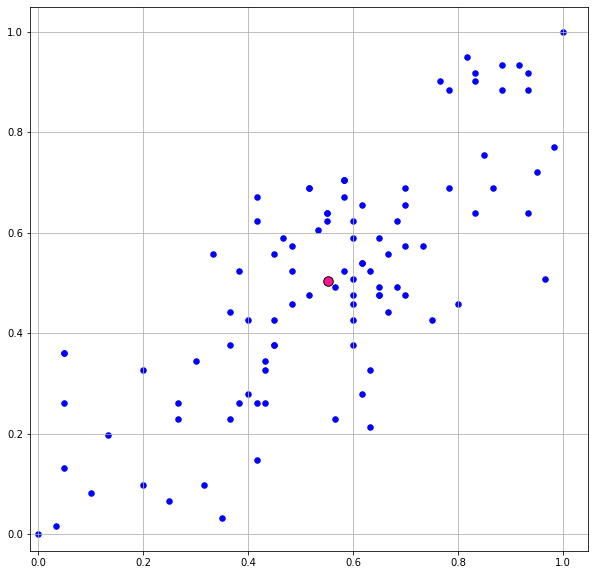

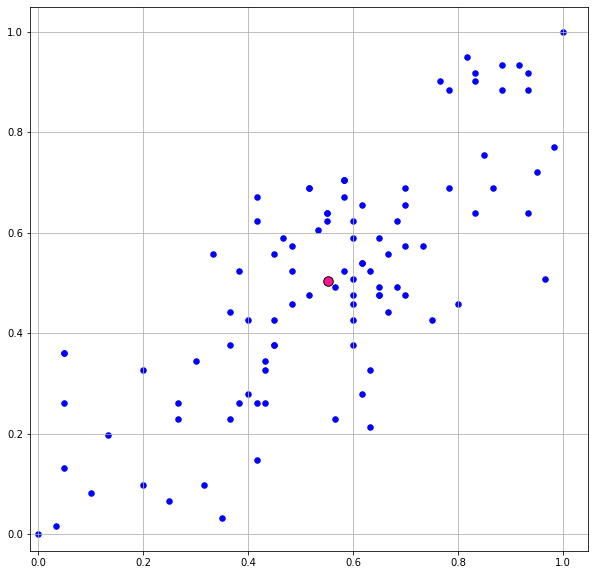

In [416]:
colors=['blue','red','green', 'yellow', 'cyan', 'magenta', 'orange', 'black', 'purple', 'gold', 'coral', 'gray', 'azure']
table = PrettyTable(["Радиус", "Центроиды кластера", "Объем кластера"])
h = (Rmax-Rmin)/8
R = 0
for i in range(8):
    R += h
    clusters, centers, k, len_c = clusters_R(R)
    table.add_row([R, centers, len_c])
    fig, ax = plt.subplots(figsize=(10, 10))
    for j in range(len(clusters)):
        for i in range(len(clusters[j])):
            plt.scatter(clusters[j][i][0], clusters[j][i][1], c=colors[j], s = 30)
    for i in range(len(centers)):
        plt.scatter(centers[i][0], centers[i][1], color = "deeppink", s=90, edgecolors='black')
    plt.grid(True)
print(table)

### Задание 8
Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

In [417]:
R = 0.001
table1 = PrettyTable(["Радиус", "Центроиды кластера", "Объем кластера"])
for i in range(8):
    R += h
    clusters, centers, k, len_c = clusters_R(R)
    table1.add_row([R, centers, len_c])
print(table1)

+---------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------+
|        Радиус       |                                                                                                                  Центроиды кластера                                                                                                                  |               Объем кластера               |
+---------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------+
| 0.16462257237363956 | {0: [0.198, 0.145], 1: [0.85

#### Вывод: 
После изменения радиуса на дельту, равную 0.001 получилась новая таблица, значения которой не отличаются от предыдущей, что означает, что метод поиска сгущений не чувствителен к погрешностям.

### Задание 9
Сравнить методы. Сделать выводы.

##### Вывод: 
По графикам точек можно увидеть, что наиболее встречающееся количество кластеров - 3(уже со 2 графика, если выкинуть ону выпавшую точку и до момента, пока радиус не станет таким, что охватит все точки целиком), что совпадает с найденым по методу силуэтов значением для метода k-means. Так же из графика метода k-means видно, что он лучше находит центры и кластеры, чем k-medians.

## Выводы: 
В ходе работы были освоены основные понятия и некоторые методы кластерного анализа, такие как k-means и k-medians, так же был освоен метод силуэтов для поиска оптимального количества кластеров и метод поиска сгущений при различных радиусах, который был проверен на чувствительность к погрешностям.